In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
data1 = pd.read_csv('updated_gas_oil_tasks (2).csv')
data2 = pd.read_csv('val_rus.csv')


In [4]:
data1


,task_id,task_name,measurement,processed_task_name,cluster,general_name
0,1,Расчистка от лесорастительности,га,расчистка лесорастительности,48,лесорастительности расчистка строительстве тру...
1,2,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
2,3,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
3,4,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
4,5,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
...,...,...,...,...,...,...
1238,1238,Демонтаж водоподающей станции,шт,демонтаж водоподающей станции,196,водоподающей станции устройство демонтаж эхз
1239,1239,Демонтаж КПП (шлагбаум),шт,демонтаж кпп шлагбаум,158,кпп шлагбаум устройство демонтаж эхз
1240,1240,Демонтаж ВЖК из вагон-домов,к.м.,демонтаж вжк вагондомов,183,вжк вагондомов комбинированного возведению ком...
1241,1241,Демонтаж ВЖК комбинированного типа,к.м.,демонтаж вжк комбинированного типа,183,вжк вагондомов комбинированного возведению ком...


In [18]:
data1


,task_id,task_name,measurement,processed_task_name,cluster,general_name
0,1,Расчистка от лесорастительности,га,расчистка лесорастительности,48,лесорастительности расчистка строительстве тру...
1,2,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
2,3,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
3,4,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
4,5,Расчистка от лесорастительности при строительс...,км,расчистка лесорастительности строительстве тру...,48,лесорастительности расчистка строительстве тру...
...,...,...,...,...,...,...
1238,1238,Демонтаж водоподающей станции,шт,демонтаж водоподающей станции,196,водоподающей станции устройство демонтаж эхз
1239,1239,Демонтаж КПП (шлагбаум),шт,демонтаж кпп шлагбаум,158,кпп шлагбаум устройство демонтаж эхз
1240,1240,Демонтаж ВЖК из вагон-домов,к.м.,демонтаж вжк вагондомов,183,вжк вагондомов комбинированного возведению ком...
1241,1241,Демонтаж ВЖК комбинированного типа,к.м.,демонтаж вжк комбинированного типа,183,вжк вагондомов комбинированного возведению ком...


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def search_task(data1, search_text):
    # 筛选出包含 search_text 的 task_name
    matching_rows = data1[data1['task_name'].str.lower().str.startswith(search_text.lower(), na=False) & 
                          data1['task_name'].str.lower().str.contains(search_text.lower(), na=False, regex=False)]
    

    # 如果没有找到任何匹配项，返回最相似的 task_name
    if matching_rows.empty:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(data1['task_name'])
        
        # 计算输入文本与所有 task_name 的相似度
        search_vector = tfidf_vectorizer.transform([search_text])
        similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
        
        # 找到最相似的文本
        best_match_index = np.argmax(similarity_scores)
        
        # 返回最相似的 task_id 或 general_name
        return data1.iloc[best_match_index]['task_id']  # 或者 'task_id' 取决于需求

    # 如果只有一个匹配项，直接返回该 task_id
    if len(matching_rows) == 1:
        return matching_rows['task_id'].values[0]  # 使用 .values[0] 返回单个值

    # 如果有多个匹配项，计算相似度
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(matching_rows['task_name'])
    
    # 计算输入文本与每个匹配文本的相似度
    search_vector = tfidf_vectorizer.transform([search_text])
    similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
    
    # 找到最相似的文本对应的行
    best_match_index = np.argmax(similarity_scores)
    
    # 返回最相似的文本的 general_name
    return matching_rows.iloc[best_match_index]['general_name']


In [7]:
search_text = "Монтаж малых конструктивных элементов м/к"  # 输入文本
result = search_task(data1, search_text)
print(result)


164


In [8]:
data2['search_result'] = data2['task_name'].apply(lambda x: search_task(data1, x))

# 保存结果到新的 CSV 文件
data2.to_csv('output_with_search_results.csv', index=False)

print(data2.head())  


                                           task_name standard_task_id  \
0             Монтаж изоляторов напряжением до 10 кВ              953   
1          Монтаж малых конструктивных элементов м/к              164   
2  Монтаж оборудования массой до 13 тн (Блок тран...              958   
3             Установка стальных опор ВЛ 35 - 500 кВ              173   
4                   Монтаж кабельных коробов, лотков              862   

   task_id search_result  
0      NaN           953  
1      NaN           164  
2      NaN           958  
3      NaN           173  
4      NaN           862  


In [9]:
data2


,task_name,standard_task_id,task_id,search_result
0,Монтаж изоляторов напряжением до 10 кВ,953,NaN,953
1,Монтаж малых конструктивных элементов м/к,164,NaN,164
2,Монтаж оборудования массой до 13 тн (Блок тран...,958,NaN,958
3,Установка стальных опор ВЛ 35 - 500 кВ,173,NaN,173
4,"Монтаж кабельных коробов, лотков",862,NaN,862
...,...,...,...,...
106,"Монтаж фундаментных, стеновых блоков и плит",133,NaN,133
107,"Устройство основания (песчаное, щебень, ПГС)",39,NaN,39
108,Устройство основания из буроопускных металличе...,штучно (опоры изоляторов),96.0,металлических свай основания устройство бурооп...
109,Устройство основания из буроопускных металличе...,м3 (опоры изоляторов),101.0,металлических свай основания устройство бурооп...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def search_task2(data1, search_text):
    # 筛选出包含 search_text 的 task_name
    matching_rows = data1[data1['task_name'].str.lower().str.startswith(search_text.lower(), na=False) & 
                          data1['task_name'].str.lower().str.contains(search_text.lower(), na=False, regex=False)]
    

    # 如果没有找到任何匹配项，返回最相似的 task_name
    if matching_rows.empty:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(data1['task_name'])
        
        # 计算输入文本与所有 task_name 的相似度
        search_vector = tfidf_vectorizer.transform([search_text])
        similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
        
        # 找到最相似的文本
        best_match_index = np.argmax(similarity_scores)
        
        # 返回最相似的 task_id 或 general_name
        return data1.iloc[best_match_index]['general_name'] # 或者 'task_id' 取决于需求

    # 如果只有一个匹配项，直接返回该 task_id
    if len(matching_rows) == 1:
        return matching_rows['general_name'].values[0]  # 使用 .values[0] 返回单个值

    # 如果有多个匹配项，计算相似度
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(matching_rows['task_name'])
    
    # 计算输入文本与每个匹配文本的相似度
    search_vector = tfidf_vectorizer.transform([search_text])
    similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
    
    # 找到最相似的文本对应的行
    best_match_index = np.argmax(similarity_scores)
    
    # 返回最相似的文本的 general_name
    return matching_rows.iloc[best_match_index]['general_name']


In [11]:
data2['search_result3'] = data2['task_name'].apply(lambda x: search_task2(data1, x))
data2.to_csv('output_with_search_results.csv', index=False)


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def search_task3(data1, search_text):
    # 筛选出包含 search_text 的 task_name
    matching_rows = data1[data1['task_name'].str.lower().str.startswith(search_text.lower(), na=False) & 
                          data1['task_name'].str.lower().str.contains(search_text.lower(), na=False, regex=False)]
    

    # 如果没有找到任何匹配项，返回最相似的 task_name
    if matching_rows.empty:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf_vectorizer.fit_transform(data1['task_name'])
        
        # 计算输入文本与所有 task_name 的相似度
        search_vector = tfidf_vectorizer.transform([search_text])
        similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
        
        # 找到最相似的文本
        best_match_index = np.argmax(similarity_scores)
        
        # 返回最相似的 task_id 或 general_name
        return data1.iloc[best_match_index]['task_id']  # 或者 'task_id' 取决于需求

    # 如果只有一个匹配项，直接返回该 task_id
    if len(matching_rows) == 1:
        return matching_rows['task_id'].values[0]  # 使用 .values[0] 返回单个值

    # 如果有多个匹配项，计算相似度
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(matching_rows['task_name'])
    
    # 计算输入文本与每个匹配文本的相似度
    search_vector = tfidf_vectorizer.transform([search_text])
    similarity_scores = cosine_similarity(search_vector, tfidf_matrix).flatten()
    
    # 找到最相似的文本对应的行
    best_match_index = np.argmax(similarity_scores)
    
    # 返回最相似的文本的 general_name
    return matching_rows.iloc[best_match_index]['task_id']


In [13]:
data2['search_result2'] = data2['task_name'].apply(lambda x: search_task2(data1, x))

# 保存结果到新的 CSV 文件
data2.to_csv('output_with_search_results.csv', index=False)

print(data2.head()) 


                                           task_name standard_task_id  \
0             Монтаж изоляторов напряжением до 10 кВ              953   
1          Монтаж малых конструктивных элементов м/к              164   
2  Монтаж оборудования массой до 13 тн (Блок тран...              958   
3             Установка стальных опор ВЛ 35 - 500 кВ              173   
4                   Монтаж кабельных коробов, лотков              862   

   task_id search_result                                     search_result3  \
0      NaN           953          изоляторов напряжением кв демонтаж монтаж   
1      NaN           164  мк ростверков фундаментов изготовление констру...   
2      NaN           958             тн оборудования массой демонтаж монтаж   
3      NaN           173                      вл кв проводов стальных нитки   
4      NaN           862           коробов лотков кабельных демонтаж монтаж   

                                      search_result2  
0          изоляторов напряжени

In [14]:
data3 = pd.read_csv('output_with_search_results.csv')
data3


,task_name,standard_task_id,task_id,search_result,search_result3,search_result2
0,Монтаж изоляторов напряжением до 10 кВ,953,NaN,953,изоляторов напряжением кв демонтаж монтаж,изоляторов напряжением кв демонтаж монтаж
1,Монтаж малых конструктивных элементов м/к,164,NaN,164,мк ростверков фундаментов изготовление констру...,мк ростверков фундаментов изготовление констру...
2,Монтаж оборудования массой до 13 тн (Блок тран...,958,NaN,958,тн оборудования массой демонтаж монтаж,тн оборудования массой демонтаж монтаж
3,Установка стальных опор ВЛ 35 - 500 кВ,173,NaN,173,вл кв проводов стальных нитки,вл кв проводов стальных нитки
4,"Монтаж кабельных коробов, лотков",862,NaN,862,коробов лотков кабельных демонтаж монтаж,коробов лотков кабельных демонтаж монтаж
...,...,...,...,...,...,...
106,"Монтаж фундаментных, стеновых блоков и плит",133,NaN,133,фундаментных стеновых плит блоков демонтаж,фундаментных стеновых плит блоков демонтаж
107,"Устройство основания (песчаное, щебень, ПГС)",39,NaN,39,устройство газонов стяжки отмостки бетонной,устройство газонов стяжки отмостки бетонной
108,Устройство основания из буроопускных металличе...,штучно (опоры изоляторов),96.0,металлических свай основания устройство бурооп...,металлических свай основания устройство бурооп...,металлических свай основания устройство бурооп...
109,Устройство основания из буроопускных металличе...,м3 (опоры изоляторов),101.0,металлических свай основания устройство бурооп...,металлических свай основания устройство бурооп...,металлических свай основания устройство бурооп...


In [15]:
import re
numeric_rows = data3[data3['standard_task_id'].apply(lambda x: bool(re.match(r'^\d+$', str(x))))]

# 2. 创建一个包含俄语文本的 `standard_task_id`
# 假设俄语文本含有字符而不是纯数字
text_rows = data3[~data3['standard_task_id'].apply(lambda x: bool(re.match(r'^\d+$', str(x))))]


In [16]:
import pandas as pd
import re
from sklearn.metrics import precision_score, recall_score, f1_score

# 假设 data3 已经加载

# 定义一个函数来判断是否是数字
def is_numeric(value):
    return bool(re.match(r'^\d+$', str(value)))

# 定义一个函数来判断是否是纯文本（非数字）
def is_text(value):
    return not is_numeric(value)

# 计算准确率、回归率、F1 分数
def calculate_metrics(data):
    # 初始化各项指标
    correct = 0
    true_positive = 0
    false_positive = 0
    false_negative = 0
    total = len(data)

    for index, row in data.iterrows():
        # 判断 standard_task_id 和 search_result 是否为数字
        standard_is_numeric = is_numeric(row['standard_task_id'])
        result_is_numeric = is_numeric(row['search_result'])

        # 判断是否正确
        if standard_is_numeric == result_is_numeric:
            correct += 1
            if standard_is_numeric and result_is_numeric:
                true_positive += 1
            elif not standard_is_numeric and not result_is_numeric:
                true_positive += 1
        else:
            if standard_is_numeric and not result_is_numeric:
                false_negative += 1
            elif not standard_is_numeric and result_is_numeric:
                false_positive += 1

    # 计算准确率
    accuracy = correct / total if total > 0 else 0

    # 计算回归率、F1分数
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, recall, f1

# 计算并输出指标
accuracy, recall, f1 = calculate_metrics(data3)
print(f"准确率: {accuracy:.2%}")
print(f"回归率 (Recall): {recall:.2%}")
print(f"F1 分数: {f1:.2%}")


准确率: 90.09%
回归率 (Recall): 99.01%
F1 分数: 94.79%


In [17]:
print(data3[['search_result', 'is_search_result_numeric', 'standard_task_id', 'is_standard_task_id_numeric']].head())


KeyError: "['is_search_result_numeric', 'is_standard_task_id_numeric'] not in index"

In [14]:
import pandas as pd

# 假设 data3 已经加载

# 创建一个新列 'real number id'，优先选择 task_id，如果为空则选择 standard_task_id
data3['real number id'] = data3['task_id'].fillna(data3['standard_task_id'])

# 输出结果查看
print(data3[['task_id', 'standard_task_id', 'real number id']].head())




   task_id standard_task_id real number id
0      NaN              953            953
1      NaN              164            164
2      NaN              958            958
3      NaN              173            173
4      NaN              862            862


In [15]:
data3


,task_name,standard_task_id,task_id,search_result,search_result2,is_search_result_numeric,is_standard_task_id_numeric,real number id
0,Монтаж изоляторов напряжением до 10 кВ,953,NaN,953,953,False,False,953
1,Монтаж малых конструктивных элементов м/к,164,NaN,164,164,False,False,164
2,Монтаж оборудования массой до 13 тн (Блок тран...,958,NaN,958,958,False,False,958
3,Установка стальных опор ВЛ 35 - 500 кВ,173,NaN,173,173,False,False,173
4,"Монтаж кабельных коробов, лотков",862,NaN,862,862,False,False,862
...,...,...,...,...,...,...,...,...
106,"Монтаж фундаментных, стеновых блоков и плит",133,NaN,133,133,False,False,133
107,"Устройство основания (песчаное, щебень, ПГС)",39,NaN,39,39,False,False,39
108,Устройство основания из буроопускных металличе...,штучно (опоры изоляторов),96.0,металлических свай основания устройство бурооп...,96,False,False,96.0
109,Устройство основания из буроопускных металличе...,м3 (опоры изоляторов),101.0,металлических свай основания устройство бурооп...,96,False,False,101.0


In [21]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# 计算准确率、回归率、F1 分数
def calculate_metrics(data):
    # 初始化计数器
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    total = len(data)

    for index, row in data.iterrows():
        # 获取真实值和预测值
        predicted = row['search_result2']
        actual = row['real number id']
        
        # 判断数字是否相等
        if predicted == actual:
            true_positive += 1  # 预测正确的数字
        else:
            false_positive += 1  # 预测错误的数字
            false_negative += 1  # 真实值与预测不一致的

    # 计算准确率
    accuracy = (true_positive) / total if total > 0 else 0

    # 计算回归率 (Recall), Precision, F1 分数
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, recall, f1

# 假设 data3 已经加载，并且包含 'search_result2' 和 'real number id' 两列
accuracy, recall, f1 = calculate_metrics(data3)

# 输出结果
print(f"准确率: {accuracy:.2%}")
print(f"回归率 (Recall): {recall:.2%}")
print(f"F1 分数: {f1:.2%}")


准确率: 84.68%
回归率 (Recall): 84.68%
F1 分数: 84.68%


In [24]:
import pandas as pd
import re

# 假设 data3 已经加载

# 定义一个函数，检查字符串中是否包含俄语文本
def is_russian_text(value):
    return bool(re.search(r'[а-яА-Я]', str(value)))  # 使用正则表达式检查俄语字符

# 提取 standard_task_id 和 search_result 都是俄语文本的行
russian_text_rows = data3[
    data3['standard_task_id'].apply(lambda x: is_russian_text(x)) & 
    data3['search_result'].apply(lambda x: is_russian_text(x))
]

# 查看提取出来的行
print(russian_text_rows)


                                             task_name  \
30                             Разводка по устройствам   
55                     Изготовление металлических свай   
56                     Изготовление металлических свай   
76   Устройство основания из буроопускных металличе...   
77   Устройство основания из буроопускных металличе...   
102                    Изготовление металлических свай   
108  Устройство основания из буроопускных металличе...   
109  Устройство основания из буроопускных металличе...   

                           standard_task_id  task_id  \
30    подключение жил кабелей (слаботочных)    923.0   
55              тонн (молниеприемные мачты)    147.0   
56            штучно (молниеприемные мачты)    148.0   
76                         штучно (порталы)     96.0   
77                             м3 (порталы)    101.0   
102                   тн (опоры изоляторов)    147.0   
108               штучно (опоры изоляторов)     96.0   
109                   м3 (опо

In [25]:
import pandas as pd
import re

# 假设 data3 已经加载

# 定义一个函数，检查字符串中是否包含俄语文本
def is_russian_text(value):
    return bool(re.search(r'[а-яА-Я]', str(value)))  # 使用正则表达式检查俄语字符

# 提取 standard_task_id 和 search_result 都是俄语文本的行
russian_text_rows = data3[
    data3['standard_task_id'].apply(lambda x: is_russian_text(x)) & 
    data3['search_result'].apply(lambda x: is_russian_text(x))
]

# 查看提取出来的行
print(russian_text_rows)


                                             task_name  \
30                             Разводка по устройствам   
55                     Изготовление металлических свай   
56                     Изготовление металлических свай   
76   Устройство основания из буроопускных металличе...   
77   Устройство основания из буроопускных металличе...   
102                    Изготовление металлических свай   
108  Устройство основания из буроопускных металличе...   
109  Устройство основания из буроопускных металличе...   

                           standard_task_id  task_id  \
30    подключение жил кабелей (слаботочных)    923.0   
55              тонн (молниеприемные мачты)    147.0   
56            штучно (молниеприемные мачты)    148.0   
76                         штучно (порталы)     96.0   
77                             м3 (порталы)    101.0   
102                   тн (опоры изоляторов)    147.0   
108               штучно (опоры изоляторов)     96.0   
109                   м3 (опо

In [32]:
# Save the DataFrame to a CSV file
russian_text_rows.to_csv('russian_text_rows.csv', index=False)



In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# 假设 russian_text_rows 已经加载

# 1. 对文本进行 TF-IDF 向量化
vectorizer = TfidfVectorizer(stop_words='english')

# 将 `standard_task_id` 和 `search_result` 转换为 TF-IDF 矩阵
standard_tfidf = vectorizer.fit_transform(russian_text_rows['standard_task_id'])
search_result_tfidf = vectorizer.transform(russian_text_rows['search_result'])

# 2. 聚类
n_clusters = 5  # 假设我们设定了 5 个聚类
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_search_result = KMeans(n_clusters=n_clusters, random_state=42)

# 对两个列分别进行聚类
standard_labels = kmeans_standard.fit_predict(standard_tfidf)
search_result_labels = kmeans_search_result.fit_predict(search_result_tfidf)

# 3. 比较聚类结果，是否位于相同的类
russian_text_rows['standard_task_id_cluster'] = standard_labels
russian_text_rows['search_result_cluster'] = search_result_labels

# 4. 判断每行的聚类是否一致
russian_text_rows['clusters_match'] = russian_text_rows['standard_task_id_cluster'] == russian_text_rows['search_result_cluster']

# 输出聚类匹配情况
print(russian_text_rows[['standard_task_id', 'search_result', 'standard_task_id_cluster', 'search_result_cluster', 'clusters_match']])

# 5. 计算精确度、召回率和 F1 分数
# 假设匹配的行算作 "1"，不匹配算作 "0"
y_true = russian_text_rows['standard_task_id_cluster']  # 聚类标签
y_pred = russian_text_rows['search_result_cluster']  # 聚类标签

precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# 输出指标
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


                           standard_task_id  \
30    подключение жил кабелей (слаботочных)   
55              тонн (молниеприемные мачты)   
56            штучно (молниеприемные мачты)   
76                         штучно (порталы)   
77                             м3 (порталы)   
102                   тн (опоры изоляторов)   
108               штучно (опоры изоляторов)   
109                   м3 (опоры изоляторов)   

                                         search_result  \
30        устройствам подключение разводка жил кабелей   
55   изготовление свай армокаркаса оголовков металл...   
56   изготовление свай армокаркаса оголовков металл...   
76   металлических свай основания устройство бурооп...   
77   металлических свай основания устройство бурооп...   
102  изготовление свай армокаркаса оголовков металл...   
108  металлических свай основания устройство бурооп...   
109  металлических свай основания устройство бурооп...   

     standard_task_id_cluster  search_result_cluster 

e:\conda\envs\chart\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\张笃韬\AppData\Local\Temp\ipykernel_9460\2342712030.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russian_text_rows['standard_task_id_cluster'] = standard_labels
C:\Users\张笃韬\AppData\Local\Temp\ipykernel_9460\2342712030.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

e:\conda\envs\chart\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\张笃韬\AppData\Local\Temp\ipykernel_9460\888939950.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russian_text_rows['standard_task_id_cluster'] = standard_labels
C:\Users\张笃韬\AppData\Local\Temp\ipykernel_9460\888939950.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

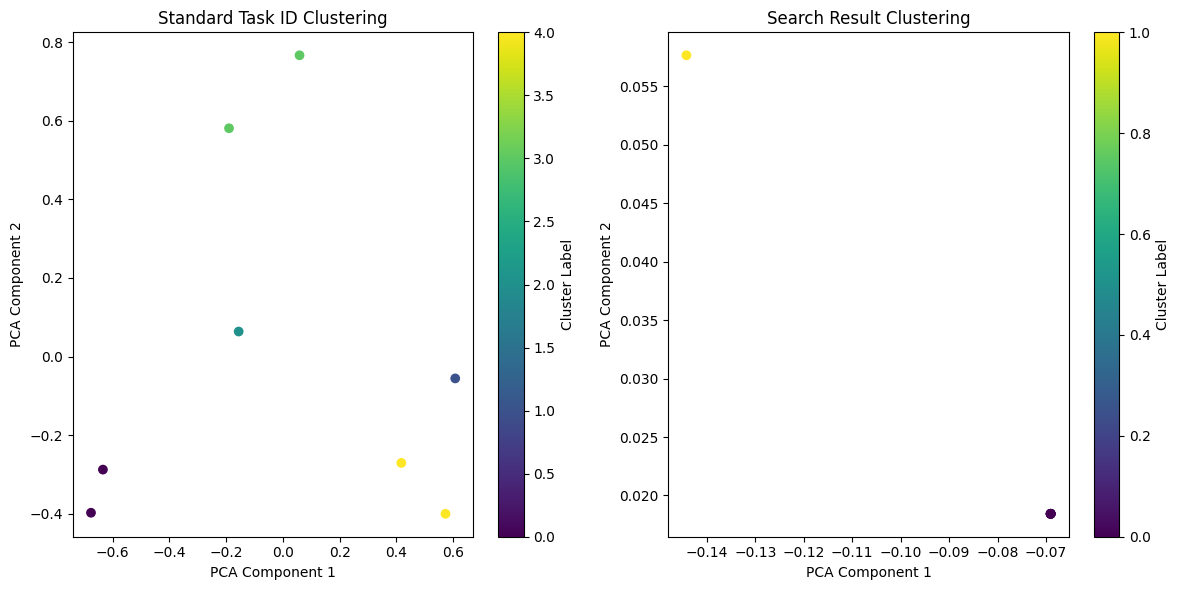

In [31]:
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 假设 russian_text_rows 已经加载

# 1. 对文本进行 TF-IDF 向量化
vectorizer = TfidfVectorizer(stop_words='english')

# 将 `standard_task_id` 和 `search_result` 转换为 TF-IDF 矩阵
standard_tfidf = vectorizer.fit_transform(russian_text_rows['standard_task_id'])
search_result_tfidf = vectorizer.transform(russian_text_rows['search_result'])

# 2. 聚类
n_clusters = 5  # 假设我们设定了 5 个聚类
kmeans_standard = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_search_result = KMeans(n_clusters=n_clusters, random_state=42)

# 对两个列分别进行聚类
standard_labels = kmeans_standard.fit_predict(standard_tfidf)
search_result_labels = kmeans_search_result.fit_predict(search_result_tfidf)

# 3. 创建新列，保存聚类标签
russian_text_rows['standard_task_id_cluster'] = standard_labels
russian_text_rows['search_result_cluster'] = search_result_labels

# 4. 使用 PCA 或 t-SNE 降维到 2D 空间以便可视化
pca = PCA(n_components=2)
standard_2d = pca.fit_transform(standard_tfidf.toarray())
search_result_2d = pca.transform(search_result_tfidf.toarray())

# t-SNE 也可以选择使用
# tsne = TSNE(n_components=2, random_state=42)
# standard_2d = tsne.fit_transform(standard_tfidf.toarray())
# search_result_2d = tsne.fit_transform(search_result_tfidf.toarray())

# 5. 绘制聚类结果
plt.figure(figsize=(12, 6))

# 标准任务ID聚类
plt.subplot(1, 2, 1)
plt.scatter(standard_2d[:, 0], standard_2d[:, 1], c=standard_labels, cmap='viridis', label='Standard Task ID Clusters')
plt.title("Standard Task ID Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')

# 搜索结果聚类
plt.subplot(1, 2, 2)
plt.scatter(search_result_2d[:, 0], search_result_2d[:, 1], c=search_result_labels, cmap='viridis', label='Search Result Clusters')
plt.title("Search Result Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')

# 显示图形
plt.tight_layout()
plt.show()


In [33]:
data3.to_csv('data3.csv', index=False)
